In [27]:
import pandas as pd

# Load the survey results and schema
survey_results = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

# Display basic information about the dataset
print(survey_results.info())
print(schema.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

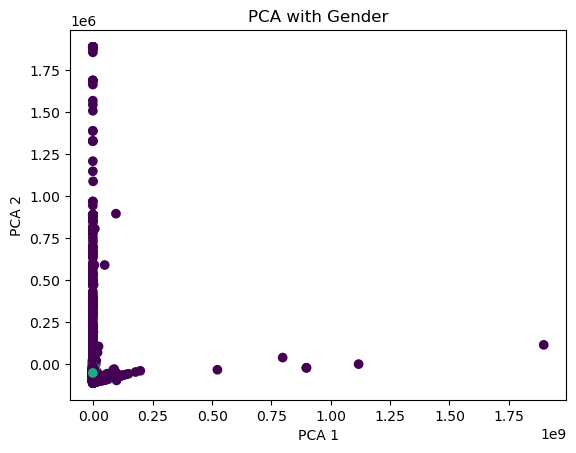

In [28]:
# Distribution of home countries
country_distribution = survey_results['Country'].value_counts()

# Most important aspect of a job
important_aspect = survey_results['LanguageWorkedWith'].value_counts()

# Visualize partitions in low-dimensional representation (using PCA)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = survey_results.dropna()  # Dropping rows with missing values
X = features.select_dtypes(include=['number'])  # Select numerical features

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=features['Gender'].astype('category').cat.codes)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA with Gender')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Convert 'YearsCodePro' to numeric and handle missing values
survey_results['YearsCode'] = pd.to_numeric(survey_results['YearsCode'], errors='coerce')

# Remove rows with missing values in relevant columns
relevant_columns = ["Age", "Country", "YearsCode"]
survey_results.dropna(subset=relevant_columns, inplace=True)

# Select relevant features and target variable
features = survey_results[relevant_columns]
target = survey_results['YearsCode']

# Convert categorical variables into dummy variables
features = pd.get_dummies(features, columns=['Age', 'Country'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.5021632077142843e-06
Root Mean Squared Error: 0.0012256276790748013
Mean Absolute Error: 2.6411935799154413e-05
R-squared: 0.9999999836770493
